# Game Sales
Luke Tao (lyt5), Euna Lee (ekl49), Vinny Huang (vh222)


----
# Introduction
This project aims to deterine what number of global sales will a game of a certain genre and score reach?

**Hypothesis**:
An action game with a high score would have a higher number of global sales than other games with any other genre and score.

# Sources
We three datasets in our analysis. The first was the primary dataset which provided sales information along with platform, year, genre, and publisher. We used two supplementary datasets to provide metacritic scores. 

The datasets are public domain and hosted by Kaggle.com

sales: https://www.kaggle.com/datasets/ulrikthygepedersen/video-games-sales

scores 1: https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic

scores 2: https://www.kaggle.com/datasets/henrylin03/metacritic-games-user-reviews-and-metascores

----

In [40]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

# load data
sales = pd.read_csv('video_games_sales.csv')
scores = pd.read_csv('top_video_games.csv', skipinitialspace=True)
scores2 = pd.read_csv('metacritic.csv', skipinitialspace=True)

sales = sales.convert_dtypes()
scores = scores.convert_dtypes()
scores2 = scores2.convert_dtypes()

# remove unecesssary/duplicate columns
sales.drop(['rank'], inplace=True, axis=1)
scores.drop(['release_date', 'summary'], inplace=True, axis=1)
scores2.drop(['release_date', 'summary'], inplace=True, axis=1)

sales.head()

,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


# Merging Files
Now that we have imported all of the datasets and removed duplicate columns, we now need to combine them all into one dataframe.

In [41]:
# Metacritic score datasets use different platform names than sales dataset
platform_dict = {  
  'PC' : 'PC',
  'Nintendo 64' : 'N64',
  'GameCube' : 'GC',
  'Game Boy' : 'GB',
  'Game Boy Color' : 'GBC',
  'Game Boy Advance' : 'GBA',
  'Switch' : 'Switch',
  'Stadia' : 'Stadia',
  'DS' : 'DS',
  '3DS' : '3DS',
  'Wii' : 'Wii',
  'Wii U' : 'WiiU',
  'PSP' : 'PSP',
  'PlayStation Vita' : 'PSV',
  'PlayStation' : 'PS',
  'PlayStation 2' : 'PS2',
  'PlayStation 3' : 'PS3', 
  'PlayStation 4' : 'PS4', 
  'PlayStation 5' : 'PS5', 
  'Dreamcast' : 'DC', 
  'Xbox' : 'XB', 
  'Xbox 360' : 'X360', 
  'Xbox One' : 'XOne',
  'Xbox Series X' : 'XSX'
}

In [42]:
# add scores to sales
scores['platform'] = scores['platform'].map(platform_dict).fillna(scores['platform'])
scores = scores.replace(to_replace='tbd', value=pd.NA)
scores = scores.rename(columns={'user_review': 'userscore',
                   'meta_score': 'metascore'}, errors='raise')
scores['userscore'] = scores['userscore'].astype('Float64')

df = pd.merge(sales, scores, on=['name', 'platform'], how='left')
df = df.sort_values(['name', 'platform'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16635 entries, 4760 to 9155
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16635 non-null  string 
 1   platform      16635 non-null  object 
 2   year          16363 non-null  Int64  
 3   genre         16635 non-null  string 
 4   publisher     16577 non-null  string 
 5   na_sales      16635 non-null  Float64
 6   eu_sales      16635 non-null  Float64
 7   jp_sales      16635 non-null  Float64
 8   other_sales   16635 non-null  Float64
 9   global_sales  16635 non-null  Float64
 10  metascore     6172 non-null   Int64  
 11  userscore     5815 non-null   Float64
dtypes: Float64(6), Int64(2), object(1), string(3)
memory usage: 1.8+ MB


,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,metascore,userscore
4760,'98 Koshien,PS,1998,Sports,Magical Company,0.15,0.1,0.12,0.03,0.41,<NA>,<NA>
8375,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,0.0,0.0,0.17,0.0,0.17,<NA>,<NA>
7123,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.0,0.03,0.23,<NA>,<NA>
8620,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006,Role-Playing,Namco Bandai Games,0.0,0.0,0.16,0.0,0.16,<NA>,<NA>
8322,.hack//G.U. Vol.3//Redemption,PS2,2007,Role-Playing,Namco Bandai Games,0.0,0.0,0.17,0.0,0.17,<NA>,<NA>


In [47]:
# add scores2 to dataframe
scores2['platform'] = scores2['platform'].map(platform_dict).fillna(scores2['platform'])
scores2 = scores2.replace(to_replace='tbd', value=pd.NA)
scores2['metascore'] = scores2['metascore'].astype('Int64')
scores2['userscore'] = scores2['userscore'].astype('Float64')
scores2 = scores2.sort_values(['name', 'platform'])

df = df.sort_values(['name', 'platform'])
df.update(scores2, join='left')
df['metascore'] = df['metascore'].astype('Int64')
df['userscore'] = df['userscore'].astype('Float64')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8228 entries, 0 to 16633
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          8228 non-null   object 
 1   platform      8228 non-null   object 
 2   year          8099 non-null   Int64  
 3   genre         8228 non-null   string 
 4   publisher     8228 non-null   string 
 5   na_sales      8228 non-null   Float64
 6   eu_sales      8228 non-null   Float64
 7   jp_sales      8228 non-null   Float64
 8   other_sales   8228 non-null   Float64
 9   global_sales  8228 non-null   Float64
 10  metascore     8228 non-null   Int64  
 11  userscore     7544 non-null   Float64
dtypes: Float64(6), Int64(2), object(2), string(2)
memory usage: 899.9+ KB


,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,metascore,userscore
0,! SPACE ACCIDENT !,PC,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76,8.1
2,!4RC4N01D!,PC,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82,4.0
3,!4RC4N01D! 2: Retro Edition,PC,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.0,80,3.8
6,!Anyway!,PC,2006,Platform,Nintendo,11.38,9.23,6.5,2.9,30.01,89,3.0
7,!Arre Unicornio!,PC,2006,Misc,Nintendo,14.03,9.2,2.93,2.85,29.02,58,6.6


In [53]:
df['publisher'] = df['publisher'].fillna("Unknown")
df = df.convert_dtypes()
print(df.isna().sum())
df = df.loc[(df['metascore'] != "<NA>") & (df['userscore'] != "<NA>") &(df['global_sales'] != float('NaN')) & (df['publisher'] != "Unknown") & (df['genre'] != "Misc")]

name             0
platform         0
year            68
genre            0
publisher        0
na_sales         0
eu_sales         0
jp_sales         0
other_sales      0
global_sales     0
metascore        0
userscore        0
dtype: int64


----
# Data Visualization
Now that we have successfully combined and cleaned the data, we can now start gaining a better understanding of its trends and features.

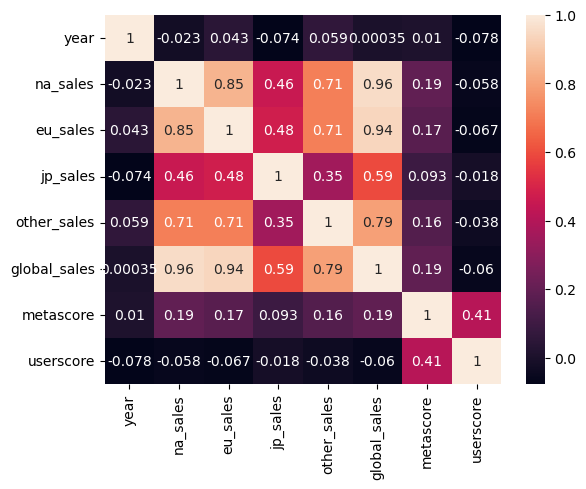

In [55]:
sns.heatmap(df.corr(), annot =True )
plt.show()

----
# Machine Learning

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # creating label encoder instance

genreLabel = le.fit_transform(df['genre']) # .fit_transform function fits labels

df.drop('genre',axis=1,inplace=True) # dropping the categorical data
df['genre'] = genreLabel # setting the categorical data values into numerical data values

publisherLabel = le.fit_transform(df['publisher']) # doing same thing with publishers

df.drop('publisher',axis=1,inplace=True)
df['publisher'] = publisherLabel



feature = df[['genre','publisher']] # setting features to be genre and publisher because idk how to deal with metacritic score and userscore (can't just set to 0)
target = df['global_sales'] 

feature_train,feature_test,target_train,target_test = train_test_split(feature,target,test_size = 0.2,random_state = 42)

model = LinearRegression()

model.fit(feature_train,target_train)
prediction = model.predict(feature_test)

print('Model training score: ', model.score(feature_train, target_train))
print('Model testing score: ', model.score(feature_test, target_test))


Model training score:  0.0008754502246963725
Model testing score:  -0.0016320620668506258


/Users/eunalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
/Users/eunalee/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
